In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("chun.csv")

In [3]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
train.drop("customerID", axis=1, inplace=True)

In [9]:
le = LabelEncoder()
for col in train.columns:
    train[col] = le.fit_transform(train[col])

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

In [11]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [12]:
x = train.drop("Churn", axis=1)
y = train["Churn"]

In [13]:
# Train and test 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\python new\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = model.predict(x_test)

In [17]:
print("Accuracy score :", accuracy_score(y_test, y_pred))

Accuracy score : 0.8168914123491838


In [19]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



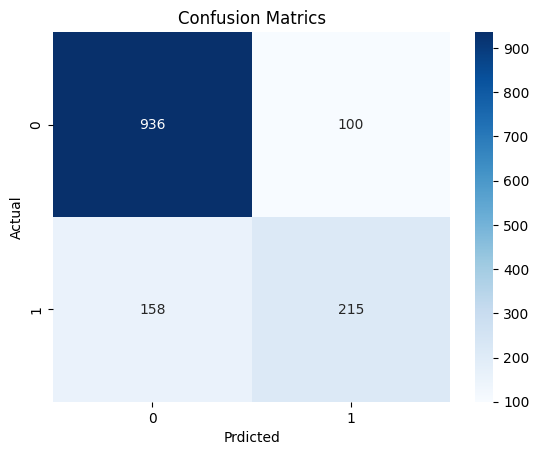

In [29]:
cnfu_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(cnfu_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prdicted')
plt.ylabel('Actual')
plt.title('Confusion Matrics')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model1.fit(x_train,y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [33]:
y_pred1 = model.predict(x_test)

In [34]:
print("Accuracy score :", accuracy_score(y_test, y_pred1))

Accuracy score : 0.8168914123491838


In [35]:
print( classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

